In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart = heart.rename(columns = {'caa': 'ca'})
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,ca,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
heart['output'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64>

In [8]:
heart.shape

(303, 14)

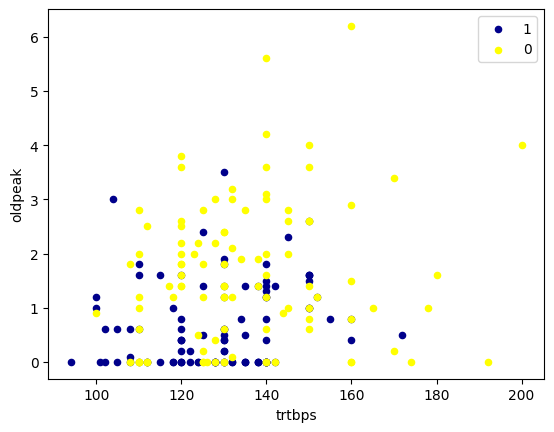

In [38]:
ax = heart[heart['output'] == 1][0:100].plot(kind='scatter', x='trtbps', y='oldpeak', color='DarkBlue', label='1');
heart[heart['output'] == 0][0:100].plot(kind='scatter', x='trtbps', y='oldpeak', color='Yellow', label='0', ax=ax);
plt.show()

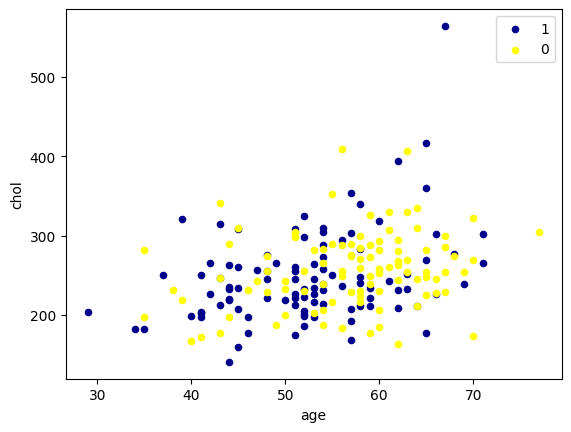

In [17]:
ax = heart[heart['output'] == 1][0:100].plot(kind='scatter', x='age', y='chol', color='DarkBlue', label='1');
heart[heart['output'] == 0][0:100].plot(kind='scatter', x='age', y='chol', color='Yellow', label='0', ax=ax);
plt.show()

In [18]:
feature_df = heart[['age', 'sex', 'ca', 'cp', 'exng', 'trtbps', 'chol', 'fbs', 'restecg','thalachh']]
X = np.asarray(feature_df)
print (X[0:5])

heart['output'] = heart['output'].astype('int')
y = np.asarray(heart['output'])
print (y [0:5])

[[ 63   1   0   3   0 145 233   1   0 150]
 [ 37   1   0   2   0 130 250   0   1 187]
 [ 41   0   0   1   0 130 204   0   0 172]
 [ 56   1   0   1   0 120 236   0   1 178]
 [ 57   0   0   0   1 120 354   0   1 163]]
[1 1 1 1 1]


In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 10) (242,)
Test set: (61, 10) (61,)


In [21]:
from sklearn import svm
kernals = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}
for kernal in kernals:
    clf = svm.SVC(kernel=kernal)
    clf.fit(X_train, y_train)
    models[kernal] = clf


In [22]:
y_pred_rbf = models['rbf'].predict(X_test)
y_pred_linear = models['linear'].predict(X_test)
y_pred_poly = models['poly'].predict(X_test)
y_pred_sigmoid = models['sigmoid'].predict(X_test)


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix, without normalization
[[21  4]
 [ 2 34]]


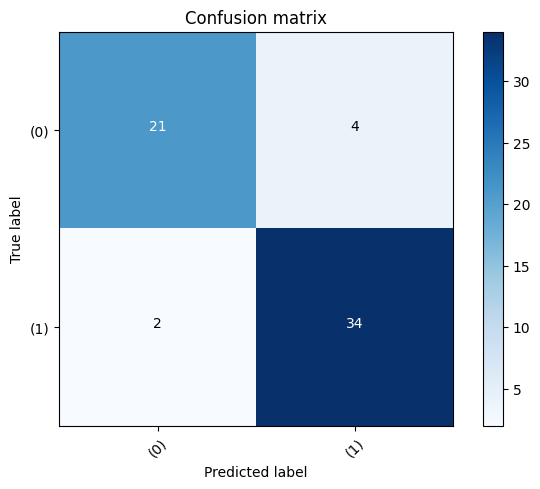

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_linear, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_linear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['(0)','(1)'],normalize= False,  title='Confusion matrix')

In [37]:
from sklearn.metrics import f1_score
print (f'F1_score : {f1_score(y_test, y_pred_linear, average='weighted')}') 

from sklearn.metrics import jaccard_score
print (f'jaccard_score : {jaccard_score(y_test, y_pred_linear, pos_label=0)}')

F1_score : 0.9009193619849357
jaccard_score : 0.7777777777777778
